 The Sparks Foundation
                                  Data Science and Business Analytics Internship
                                  
    TASK 3:EXPLORATORY DATA ANALYSIS OF RETAIL STORES
    
    Data source:https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view
    
    Done by: R.J.Subhiksha


In [4]:
import numpy as np
import pandas as pd
import seaborn as cns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

In [8]:
data=pd.read_csv("C:\\Users\\krame\\Downloads\\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
#Checking data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
#To check any missing values or outliers
data.shape

(9994, 13)

In [12]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


This shows only continous variables. So we can infer there is no missing values and there is a high difference btw max and 75% so there are outliers in the dataset

In [13]:
data.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [14]:
#Analyse the segment of people buying from the shop
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

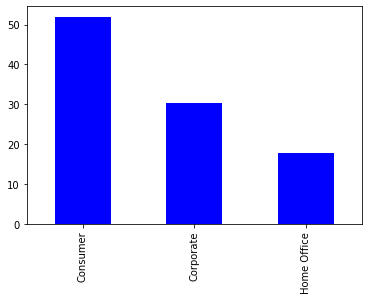

In [17]:
s=(data['Segment'].value_counts()/len(data['Segment'])*100).plot(kind="bar",color='b')

The graph shows that 50% are customers and remaining are corporates and home offices

In [18]:
#Analyse ship mode
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [20]:
m=(data['Ship Mode'].value_counts())/len(data['Ship Mode'])*100
m

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

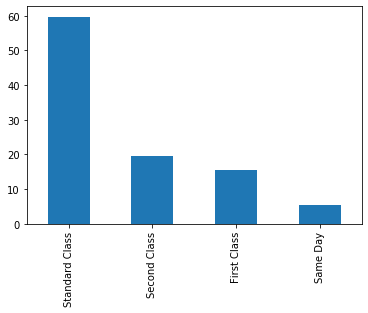

In [21]:
m.plot(kind="bar")

The above graph infers most shipping belongs to Standard Class and the percentage of deliveries made on same day is minimum


In [22]:
#Analyse Category
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

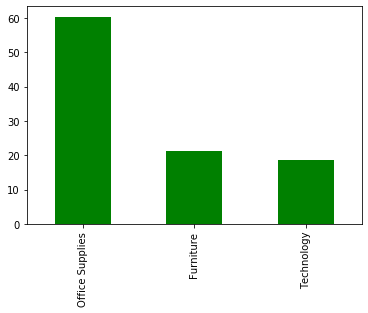

In [24]:
c=(data['Category'].value_counts())/len(data['Category'])*100
c.plot(kind="bar",color="green")

The above graph shows most categories belong to office supplies 

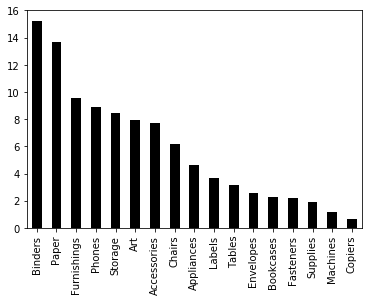

In [25]:
#Analyse subcategory
s=(data['Sub-Category'].value_counts())/len(data['Sub-Category'])*100
s.plot(kind="bar",color="black")

From the graph we can infer
  i)10-15% subcategory falls under Office supplies
  ii)2-8% subcategory falls under Furniture and technology

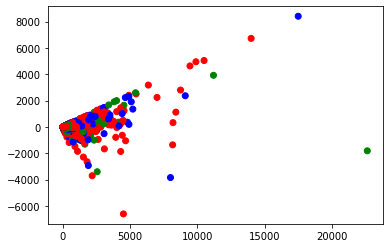

In [27]:
fig, ax =plt.subplots()
colors={'Consumer':'red','Corporate':'blue','Home Office':'green'}
ax.scatter(data['Sales'],data['Profit'],c=data['Segment'].apply(lambda x: colors[x]))
plt.show()

Above plot says there is more profit in Customers segment

In [28]:
data.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')


Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [29]:
data.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')


Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


From above inference we can say that for discount greater than 30% the store was on loss and between 0-20% discount the store was getting profit

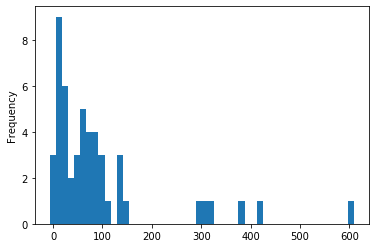

In [32]:
temp_data=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.1)]
temp_data['Profit'].plot.hist(bins=50)

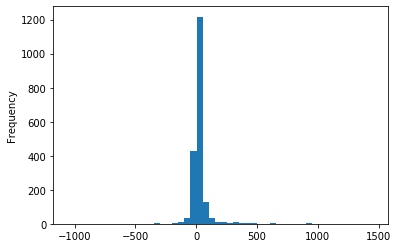

In [33]:
temp_data=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

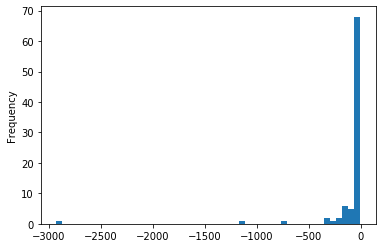

In [35]:
temp_data=data.loc[(data['Segment']=='Corporate')&(data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

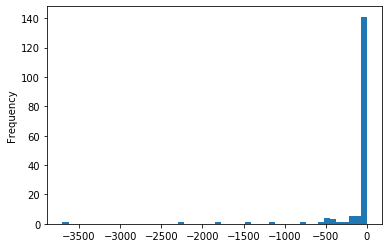

In [36]:
temp_data=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

The above graphs states that when discount<=30% the store earns profit and when the discount is above 30% store falls to loss

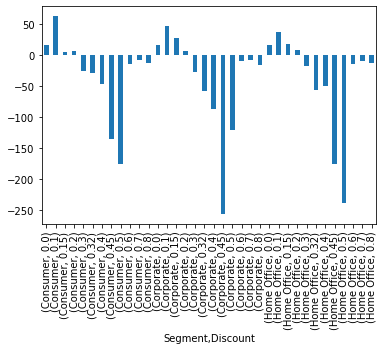

In [44]:
temp=data.groupby(['Segment','Discount']).Profit.median()
temp.plot(kind='bar',stacked=True)

The above plot shows the overall profit of all the segments with their discounts